# Problem Statement



# Dataset Information

# Content

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",500)

In [321]:
data = pd.read_csv("UCI_Credit_Card.csv")

In [322]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [323]:
data.rename(columns={"default.payment.next.month":"classes"},inplace = True)
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,classes
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [324]:
data.drop(["ID","SEX","EDUCATION","MARRIAGE","AGE"],inplace=True, axis =1)
data

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,classes
0,20000.0,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [325]:
data.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,classes
0,20000.0,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [326]:
data.describe()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,classes
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [327]:
data.isnull().sum()

LIMIT_BAL    0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
classes      0
dtype: int64

In [328]:
data.classes.value_counts()

0    23364
1     6636
Name: classes, dtype: int64

In [329]:
df = data

In [330]:
df.shape

(30000, 20)

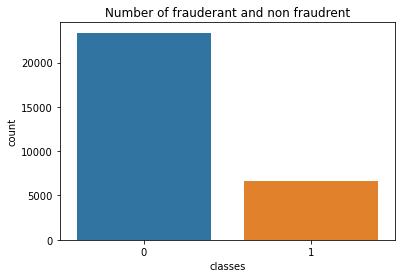

In [331]:
# bar plot for number of fraudrent and non fraudrent
sns.countplot(data = df,x= "classes")
plt.title("Number of frauderant and non fraudrent")
plt.show()

In [332]:
percentage_of_frauderant = (6636/30000)*100
percentage_of_nonfrauderant = (23364/30000)*100
print(f"Fraudrent {percentage_of_frauderant} %")
print(f"Non Frauderant {percentage_of_nonfrauderant} %")

Fraudrent 22.12 %
Non Frauderant 77.88000000000001 %


In [333]:
# creating fraudlent dataframe
fraud_data = df[df["classes"] == 1]

# creating non fraudlent dataframe
nonfraud_data = df[df["classes"]==0]

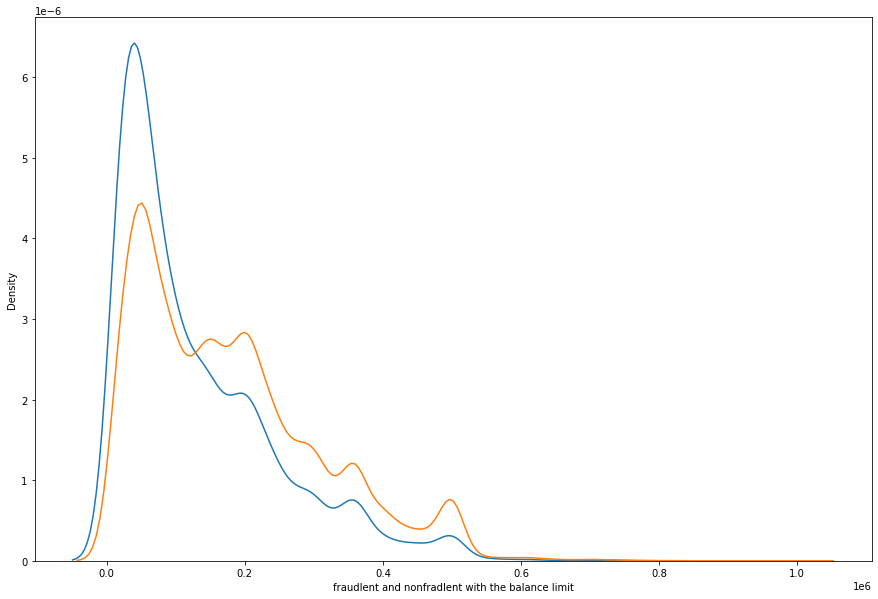

In [334]:
# Distribution plot
plt.figure(figsize=(15,10))
pl = sns.distplot(fraud_data['LIMIT_BAL'],label ='fraudlent', hist = False)
pl = sns.distplot(nonfraud_data['LIMIT_BAL'],label = 'nonfraudlent',hist = False)
pl.set(xlabel = "fraudlent and nonfradlent with the balance limit")
plt.show()


# Train test split

In [335]:
from sklearn.model_selection import train_test_split

In [336]:
# x is the feature variable and y is the target variable
x = df.drop('classes',axis = 1)
y =  df['classes']

In [337]:
# splitting data into train and test in 70:30 
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7, test_size = 0.3, random_state = 100)

In [338]:
x_train

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
4636,90000.0,-1,-1,-1,-1,0,-1,3363.0,174.0,1473.0,390.0,390.0,780.0,174.0,1473.0,780.0,0.0,780.0,0.0
11785,20000.0,-2,-2,-2,-2,-1,-1,836.0,390.0,390.0,390.0,1487.0,3560.0,390.0,390.0,390.0,1487.0,3560.0,15000.0
11987,20000.0,2,2,3,3,3,3,1050.0,1050.0,1050.0,1050.0,1050.0,1050.0,0.0,0.0,0.0,0.0,0.0,0.0
11648,50000.0,0,0,0,0,2,0,29336.0,30502.0,31161.0,25294.0,24843.0,19576.0,1641.0,1300.0,1629.0,0.0,1000.0,1007.0
12890,180000.0,0,0,0,0,0,0,134797.0,134041.0,132295.0,130166.0,129158.0,127963.0,5000.0,4600.0,4600.0,4700.0,4972.0,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,20000.0,1,2,2,0,0,2,11087.0,11712.0,11164.0,11395.0,11927.0,9186.0,1100.0,0.0,289.0,594.0,0.0,50.0
24423,10000.0,2,0,0,0,0,0,9075.0,8593.0,9582.0,8986.0,9691.0,9889.0,2000.0,1300.0,1200.0,1000.0,1000.0,569.0
14147,100000.0,0,0,0,0,0,0,94656.0,88758.0,90357.0,89209.0,84983.0,81484.0,4171.0,4044.0,3420.0,3300.0,3886.0,2730.0
23320,80000.0,-1,-1,-1,-1,0,-1,2175.0,358.0,1872.0,746.0,746.0,4424.0,358.0,1872.0,746.0,0.0,4424.0,0.0


# checking the skewness

In [339]:
cols = x_train.columns
cols

Index(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'],
      dtype='object')

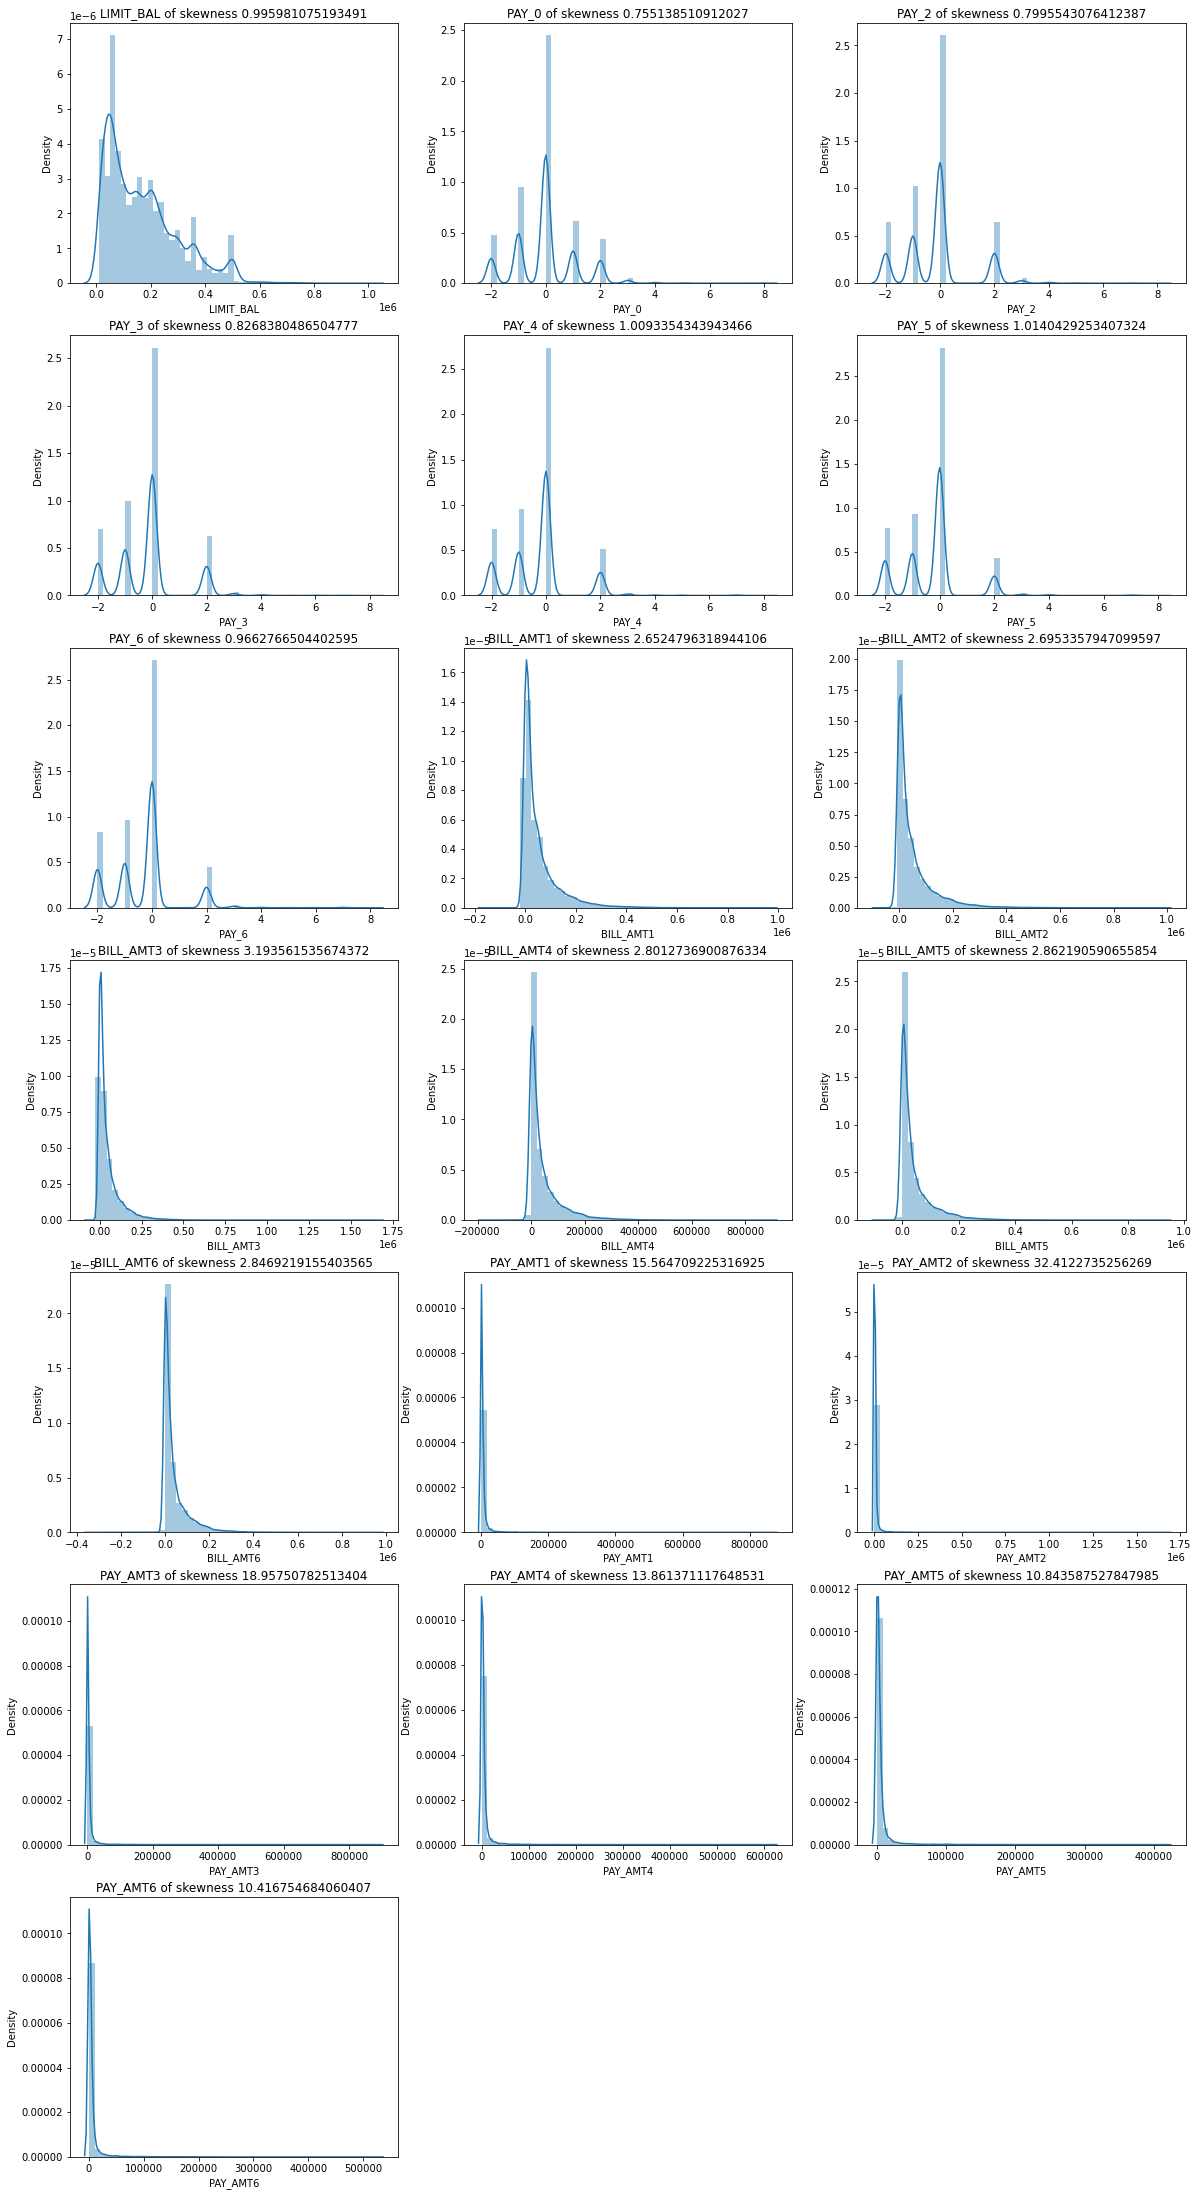

In [340]:
# plots of all the columns skewness
n = 0
plt.figure(figsize=(20,45))
for col in cols:
    n = n+1
    plt.subplot(8,3,n)
    sns.distplot(x_train[col])
    plt.title(f"{col} of skewness {x_train[col].skew()}")

# reducing the skewness using power transformer

In [341]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
x_train[cols] = pt.fit_transform(x_train)
# Transform the test set
x_test[cols] = pt.transform(x_test)

In [342]:
x_train

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
4636,-0.402430,-0.876888,-0.702627,-0.671857,-0.642053,0.350753,-0.584264,-0.668127,-0.745684,-0.691840,-0.690403,-0.684544,-0.630838,-0.837296,-0.030914,-0.177069,-1.573537,-0.076385,-1.515880
11785,-1.666985,-1.989896,-1.817826,-1.772572,-1.766364,-0.623503,-0.584264,-0.723980,-0.738062,-0.724307,-0.690403,-0.651853,-0.570583,-0.589081,-0.539866,-0.423768,0.174785,0.566215,1.306299
11987,-1.666985,1.661751,1.620602,2.213925,2.305099,2.420432,2.397156,-0.718744,-0.718164,-0.703727,-0.672881,-0.664178,-0.624558,-1.718857,-1.697837,-1.627334,-1.573537,-1.556165,-1.515880
11648,-0.957804,0.109172,0.245267,0.267913,0.317801,1.808041,0.371843,-0.232984,-0.173342,-0.133767,-0.214639,-0.171943,-0.271682,-0.023756,-0.084832,0.122614,-1.573537,0.017723,0.060743
12890,0.375060,0.109172,0.245267,0.267913,0.317801,0.350753,0.371843,1.162862,1.226489,1.263812,1.342889,1.446869,1.441838,0.552600,0.528980,0.621567,0.708394,0.731346,0.736117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,-1.666985,0.932945,1.620602,1.643524,0.317801,0.350753,1.798521,-0.524969,-0.491246,-0.480768,-0.459866,-0.417145,-0.460442,-0.199141,-1.697837,-0.520875,-0.181175,-1.556165,-0.826888
24423,-2.099184,1.661751,0.245267,0.267913,0.317801,0.350753,0.371843,-0.560266,-0.550673,-0.511588,-0.505482,-0.462939,-0.447217,0.068749,-0.084832,-0.006792,0.013951,0.017723,-0.141968
14147,-0.293327,0.109172,0.245267,0.267913,0.317801,0.350753,0.371843,0.662061,0.653256,0.722083,0.767305,0.803593,0.737137,0.449145,0.458967,0.469110,0.533060,0.608622,0.461149
23320,-0.520814,-0.876888,-0.702627,-0.671857,-0.642053,0.350753,-0.584264,-0.693138,-0.739133,-0.681167,-0.680694,-0.673204,-0.552995,-0.617529,0.076444,-0.193914,-1.573537,0.672551,-1.515880


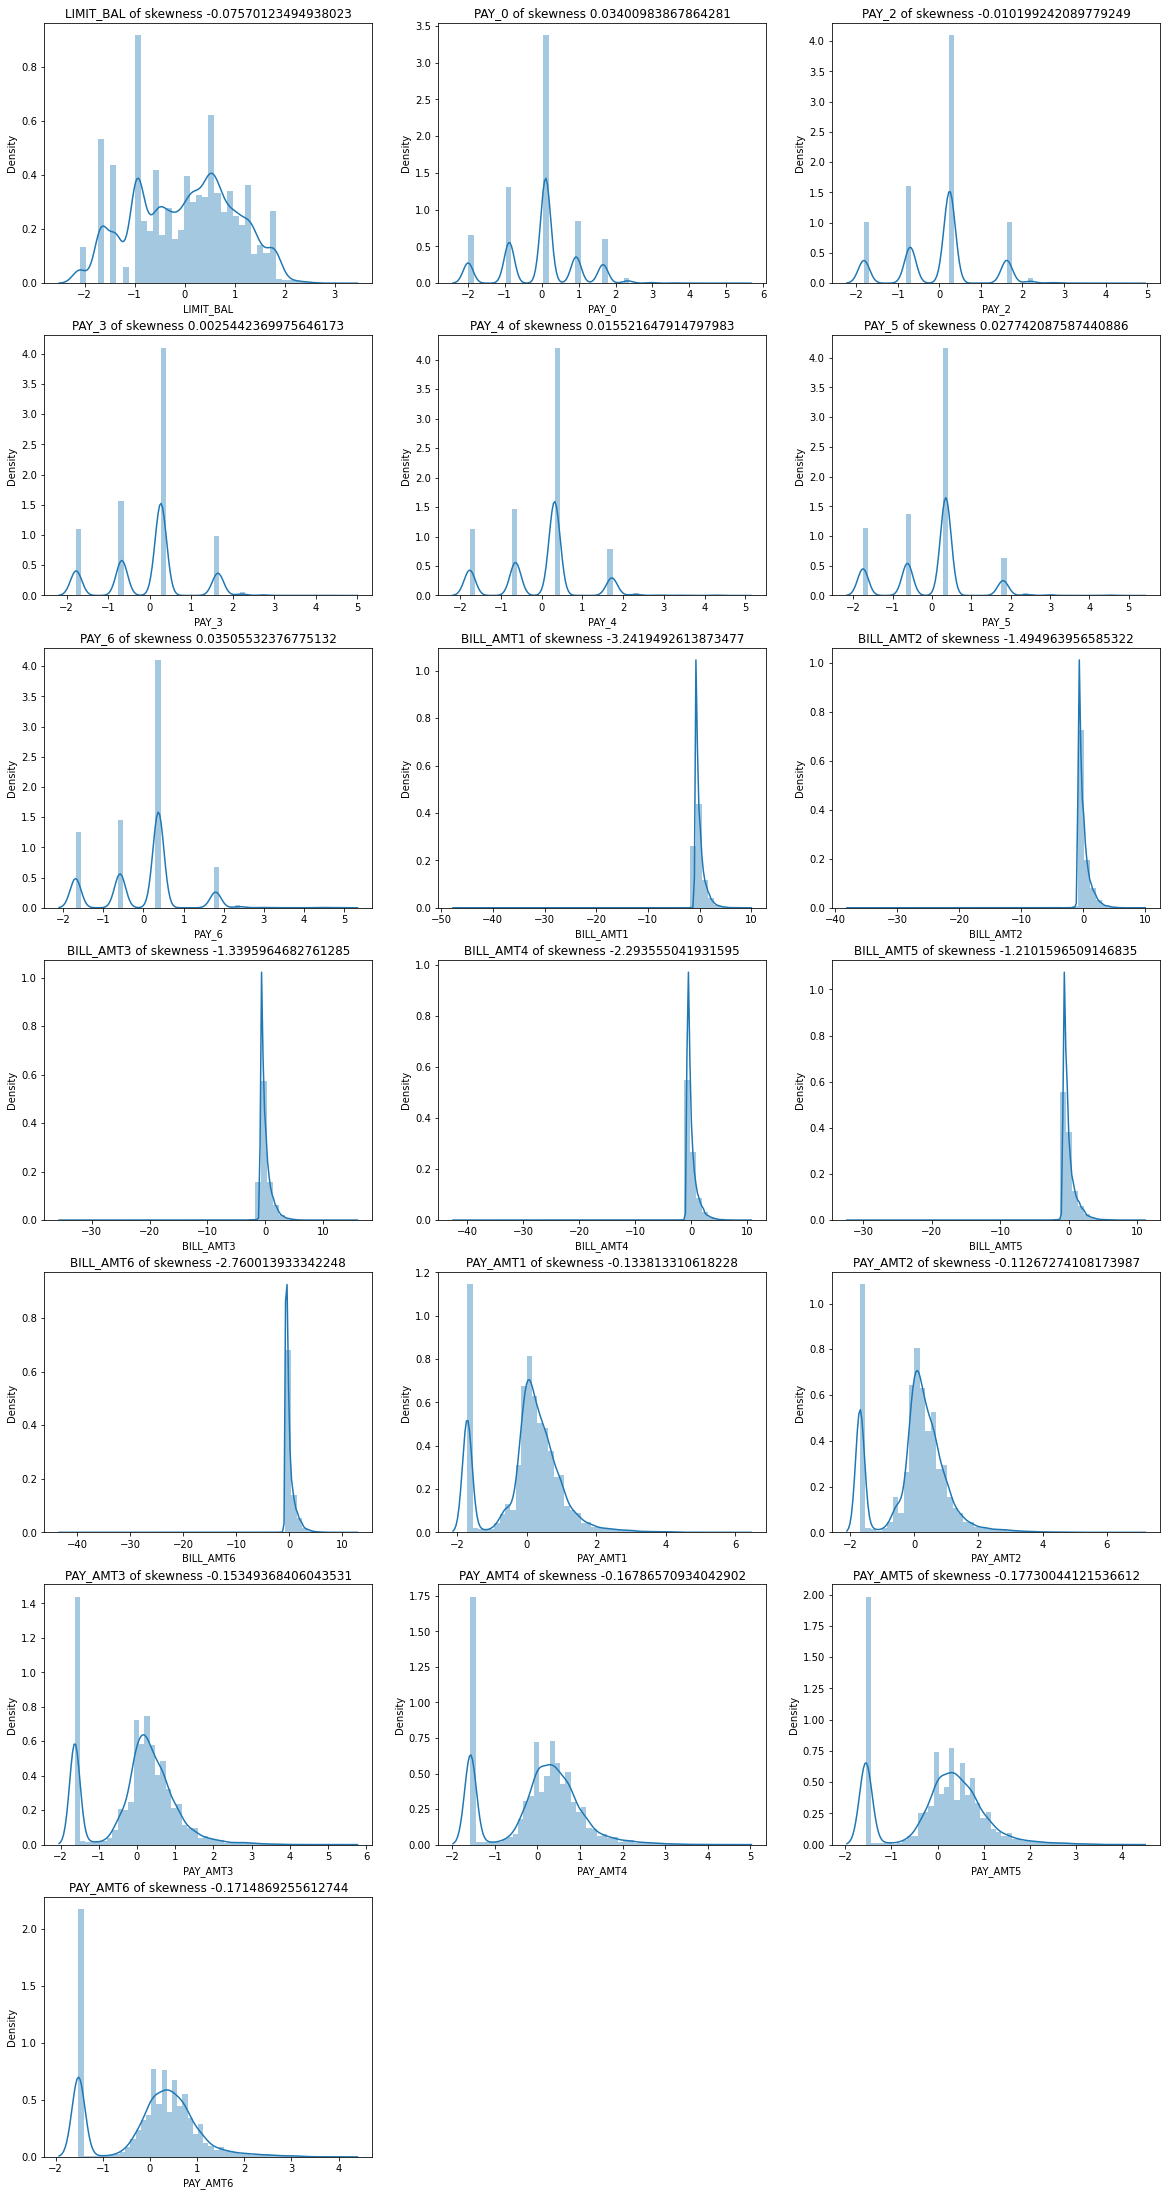

In [343]:
# now plottting the skewness after the transformation
n = 0
plt.figure(figsize=(20,45))
for col in cols:
    n = n+1
    plt.subplot(8,3,n)
    sns.distplot(x_train[col])
    plt.title(f"{col} of skewness {x_train[col].skew()}")

# Balancing the data set then Model training

# Handling data imbalance
As we see that the data is heavily imbalanced, We will try several approaches for handling data imbalance.

Undersampling :- Here for balancing the class distribution, the non-fraudulent transctions count will be reduced to 396 (similar count of fraudulent transctions)
Oversampling :- Here we will make the same count of non-fraudulent transctions as fraudulent transctions.
SMOTE :- Synthetic minority oversampling technique. It is another oversampling technique, which uses nearest neighbor algorithm to create synthetic data.
Adasyn:- This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

# Undersampling

In [344]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [345]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [346]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [347]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [348]:
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling x, y
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

In [349]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 16437, 1: 4563})
New class distribution:- Counter({0: 4563, 1: 4563})


In [350]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.001,0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(x_train_rus, y_train_rus)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [351]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013764,0.006747,0.002991,1.544526e-03,0.001,{'C': 0.001},0.712831,0.758172,0.750799,0.740778,0.733706,0.739257,0.015636,7,0.747216,0.736007,0.738359,0.740468,0.741383,0.740687,0.003755
1,0.016755,0.001164,0.002593,4.885582e-04,0.01,{'C': 0.01},0.714236,0.756642,0.752023,0.742769,0.736504,0.740435,0.014861,1,0.749346,0.738279,0.740387,0.742507,0.743787,0.742861,0.003746
2,0.020546,0.001850,0.002593,4.887723e-04,0.1,{'C': 0.1},0.714111,0.755669,0.752419,0.742485,0.736287,0.740194,0.014763,2,0.749223,0.738335,0.740390,0.742707,0.743808,0.742893,0.003687
3,0.020944,0.002958,0.002792,7.463658e-04,1,{'C': 1},0.714019,0.755246,0.752306,0.742477,0.736035,0.740016,0.014702,3,0.749169,0.738318,0.740391,0.742737,0.743814,0.742886,0.003673
4,0.023737,0.000400,0.002792,7.464807e-04,10,{'C': 10},0.714007,0.755201,0.752289,0.742488,0.736001,0.739997,0.014696,5,0.749165,0.738314,0.740389,0.742745,0.743812,0.742885,0.003673
5,0.020944,0.003678,0.002992,5.223489e-07,100,{'C': 100},0.713998,0.755207,0.752288,0.742496,0.735995,0.739997,0.014701,6,0.749164,0.738314,0.740388,0.742744,0.743812,0.742885,0.003673
6,0.028123,0.001715,0.002992,4.156970e-07,1000,{'C': 1000},0.713998,0.755207,0.752290,0.742496,0.735995,0.739997,0.014701,4,0.749164,0.738314,0.740388,0.742745,0.743813,0.742885,0.003672


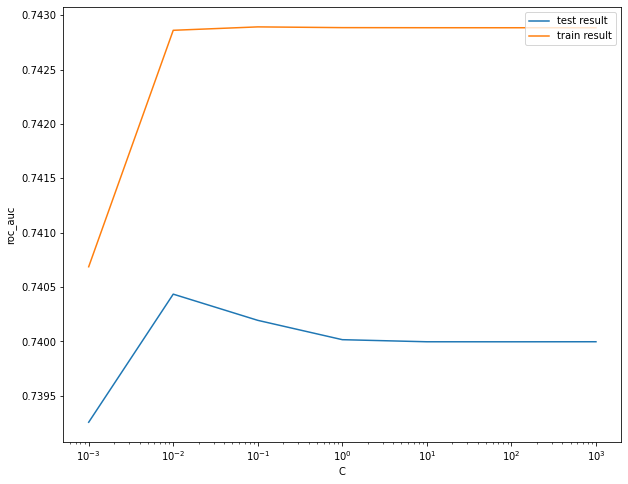

In [352]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 8))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'],loc ='upper right')
plt.xscale('log')

In [353]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(f"The highest test roc_auc is {best_score} at C = {best_C}")

The highest test roc_auc is 0.7404350258148007 at C = 0.01


In [354]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.01)

In [355]:
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(x_train_rus, y_train_rus)

In [356]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(x_train_rus)

In [357]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[3258 1305]
 [1586 2977]]


In [358]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [359]:
print(TP,TN,FP,FN)

2977 3258 1305 1586


In [360]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))  # it takes two arg y_pred and y_train.

Accuracy:- 0.683212798597414
Sensitivity:- 0.6524216524216524
Specificity:- 0.7140039447731755
F1-Score:- 0.6731486715658563


In [361]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      4563
           1       0.70      0.65      0.67      4563

    accuracy                           0.68      9126
   macro avg       0.68      0.68      0.68      9126
weighted avg       0.68      0.68      0.68      9126



In [362]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(x_train_rus)[:,1]

In [363]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.7425419537390407

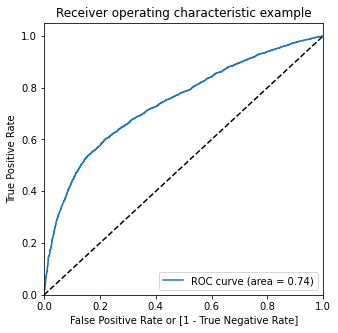

In [364]:
# Plot the ROC curve
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


draw_roc(y_train_rus, y_train_pred_proba)

# prediction on test set

In [365]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(x_test)

In [366]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4965 1962]
 [ 686 1387]]


In [367]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [368]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79      6927
           1       0.41      0.67      0.51      2073

    accuracy                           0.71      9000
   macro avg       0.65      0.69      0.65      9000
weighted avg       0.77      0.71      0.73      9000



In [369]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7057777777777777
Sensitivity:- 0.6690786300048239
Specificity:- 0.7167605023819835


In [370]:
# roc in test set
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(x_test)[:,1]

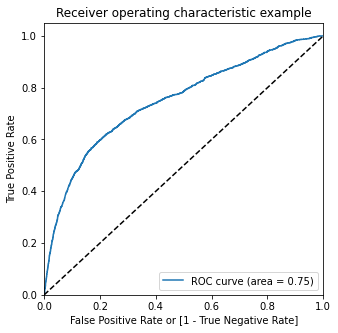

In [371]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# summary

# Train set
Accuracy : 0.68
Sensitivity : 0.64
Specificity : 0.72
ROC :         0.74

# Test set
Accuracy :  0.70
Sensitivity : 0.66
Specificity : 0.71
ROC :         0.75

# XGBOOST

In [372]:
# Importing XGBoost
from xgboost import XGBClassifier

In [373]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train_rus, y_train_rus)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, 

In [374]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.355723,0.022879,0.007314,1.243879e-03,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.766718,0.776573,0.764348,0.769213,0.005294,3,0.831065,0.821892,0.828347,0.827101,0.003847
1,0.376667,0.009080,0.005984,6.743496e-07,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.765210,0.780959,0.762582,0.769583,0.008115,2,0.840779,0.832778,0.840237,0.837931,0.003651
2,0.402599,0.003291,0.005984,6.257699e-07,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.768813,0.782571,0.767111,0.772832,0.006922,1,0.843254,0.833630,0.842459,0.839781,0.004362
3,0.318821,0.027571,0.005984,7.018853e-07,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.741706,0.737074,0.735452,0.738077,0.002650,6,0.835939,0.834792,0.835071,0.835268,0.000488
4,0.371681,0.004909,0.005984,2.973602e-07,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.749993,0.751519,0.735751,0.745754,0.007101,5,0.867784,0.863707,0.867290,0.866260,0.001817
5,0.372678,0.010628,0.006317,4.700779e-04,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.748052,0.760347,0.743835,0.750745,0.007005,4,0.889091,0.886277,0.889772,0.888380,0.001513


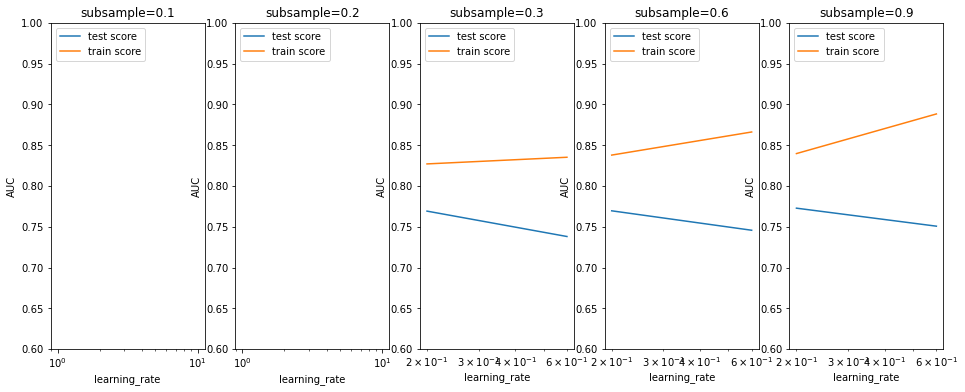

In [375]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.09,0.1,0.2, 0.6], 
             'subsample': [0.1,0.2,0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [376]:
# models with hyper parameters
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [377]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(x_train_rus, y_train_rus)

[12:13:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor=None, ...)

In [378]:
# prediction on train set
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(x_train_rus)

In [379]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)

[[4563    0]
 [   0 4563]]


In [380]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [381]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8989699758930528
Sensitivity:- 1.0
Specificity:- 1.0


In [382]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4563
           1       0.91      0.89      0.90      4563

    accuracy                           0.90      9126
   macro avg       0.90      0.90      0.90      9126
weighted avg       0.90      0.90      0.90      9126



In [383]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(x_train_rus)[:,1]

In [384]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9683452052591788

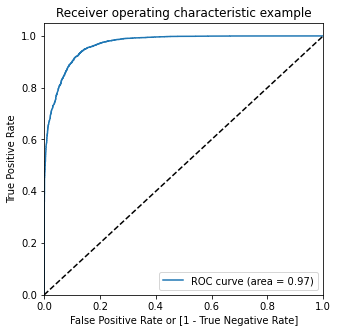

In [385]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

# Prediction on test test

In [386]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(x_test)

In [387]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5082 1845]
 [ 689 1384]]


In [388]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [389]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7184444444444444
Sensitivity:- 0.6676314520019295
Specificity:- 0.7336509311390212


In [390]:
# classification_report
print(classification_report(y_test, y_test_pred))      

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      6927
           1       0.43      0.67      0.52      2073

    accuracy                           0.72      9000
   macro avg       0.65      0.70      0.66      9000
weighted avg       0.78      0.72      0.74      9000



In [391]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(x_test)[:,1]

In [392]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.7626394434802859

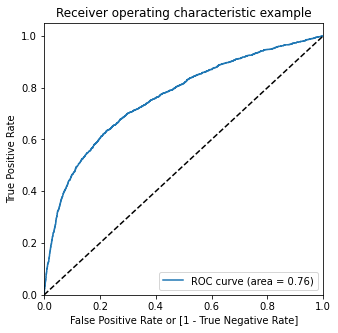

In [393]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# summary

# Train set
Accuracy : 0.92
Sensitivity : 1
Specificity : 1
ROC :         0.98

# Test set
Accuracy :  0.71
Sensitivity : 0.66
Specificity : 0.72
ROC :         0.77

# Decision Tree

In [394]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [395]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [396]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.036236,0.005297,0.003990,0.000815,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.744500,0.762096,0.753897,0.753498,0.007189,7
1,0.029920,0.002154,0.002993,0.000001,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.744500,0.762096,0.753897,0.753498,0.007189,7
2,0.027917,0.002164,0.003002,0.000015,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.752431,0.765165,0.758048,0.758548,0.005211,3
3,0.027937,0.001615,0.003313,0.000478,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.752431,0.765165,0.758048,0.758548,0.005211,3
4,0.042886,0.000814,0.003325,0.000470,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.744924,0.769231,0.755700,0.756618,0.009945,6
5,0.038564,0.001245,0.002660,0.000470,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.744924,0.769231,0.755711,0.756622,0.009944,5
6,0.033578,0.001244,0.003002,0.000014,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.757021,0.766088,0.764329,0.762479,0.003925,1
7,0.035238,0.002884,0.002661,0.000471,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.757021,0.766088,0.764301,0.762470,0.003921,2


In [397]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.7624792823042962
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [398]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(x_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [399]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(x_train_rus)

In [400]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[3612  951]
 [1662 2901]]


In [401]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [402]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7136752136752137
Sensitivity:- 0.6357659434582511
Specificity:- 0.7915844838921762


In [403]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73      4563
           1       0.75      0.64      0.69      4563

    accuracy                           0.71      9126
   macro avg       0.72      0.71      0.71      9126
weighted avg       0.72      0.71      0.71      9126



In [404]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(x_train_rus)[:,1]

In [405]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.7761341222879684

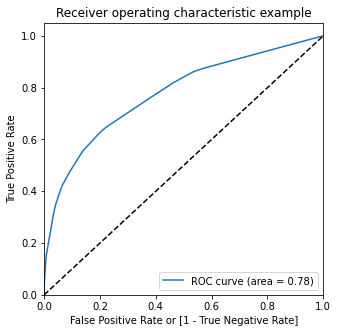

In [406]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [407]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(x_test)

In [408]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5405 1522]
 [ 774 1299]]


In [409]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [410]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7448888888888889
Sensitivity:- 0.6266280752532561
Specificity:- 0.7802800635195611


In [411]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      6927
           1       0.46      0.63      0.53      2073

    accuracy                           0.74      9000
   macro avg       0.67      0.70      0.68      9000
weighted avg       0.78      0.74      0.76      9000



In [412]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(x_test)[:,1]

In [413]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.758397563565349

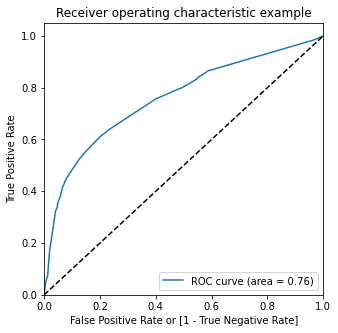

In [414]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# summary

# Train set
Accuracy : 0.70
Sensitivity : 0.62
Specificity : 0.79
ROC :         0.77

# Test set
Accuracy :  0.70
Sensitivity : 0.62
Specificity : 0.79
ROC :         0.76

# Random forest

In [415]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [416]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(x_train_rus, y_train_rus)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [417]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc-auc of 0.7741612205542029 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [418]:
# model with the best hyperparameters

rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=200)

In [419]:
# Fit the model
rfc_bal_rus_model.fit(x_train_rus, y_train_rus)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200)

In [420]:
# Predictions on the train set
y_train_pred = rfc_bal_rus_model.predict(x_train_rus)

In [421]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[3754  809]
 [1744 2819]]


In [422]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [423]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.720249835634451
Sensitivity:- 0.6177953101030024
Specificity:- 0.8227043611658996
F1-Score:- 0.6883164448785252


In [424]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.68      0.82      0.75      4563
           1       0.78      0.62      0.69      4563

    accuracy                           0.72      9126
   macro avg       0.73      0.72      0.72      9126
weighted avg       0.73      0.72      0.72      9126



In [425]:
# Predicted probability
y_train_pred_proba = rfc_bal_rus_model.predict_proba(x_train_rus)[:,1]

In [426]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.7882029169727884

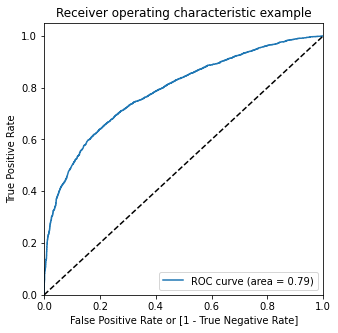

In [427]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [428]:
# Predictions on the test set
y_test_pred = rfc_bal_rus_model.predict(x_test)

In [429]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5651 1276]
 [ 805 1268]]


In [430]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [431]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7687777777777778
Sensitivity:- 0.6116739025566812
Specificity:- 0.815793272701025


In [432]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.84      6927
           1       0.50      0.61      0.55      2073

    accuracy                           0.77      9000
   macro avg       0.69      0.71      0.70      9000
weighted avg       0.79      0.77      0.78      9000



In [433]:
# Predicted probability
y_test_pred_proba = rfc_bal_rus_model.predict_proba(x_test)[:,1]

In [434]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.7781198120764744

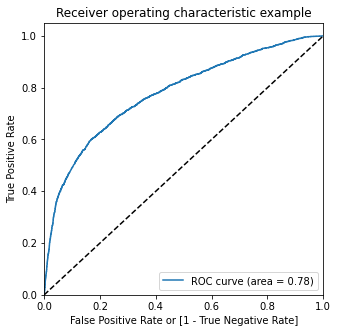

In [435]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [436]:
# summary

# Train set
Accuracy : 0.72
Sensitivity : 0.60
Specificity : 0.83
ROC :         0.79

# Test set
Accuracy :  0.77
Sensitivity : 0.60
Specificity : 0.82
ROC :         0.78

# Oversampling

In [437]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [438]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

In [439]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 16437, 1: 4563})
New class distribution:- Counter({1: 16437, 0: 16437})


# Logistic regression

In [440]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [441]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.055772,0.008347,0.003989,0.000631,0.01,{'C': 0.01},0.733861,0.735789,0.732896,0.746099,0.743614,0.738452,0.005369,1,0.740636,0.740023,0.740368,0.737092,0.737470,0.739118,0.001517
1,0.053774,0.003105,0.003795,0.000401,0.1,{'C': 0.1},0.733849,0.735508,0.732830,0.746003,0.743709,0.738380,0.005405,2,0.740669,0.740005,0.740380,0.737065,0.737422,0.739108,0.001541
2,0.057067,0.008144,0.003589,0.000491,1,{'C': 1},0.733840,0.735458,0.732820,0.746001,0.743693,0.738362,0.005410,3,0.740674,0.739998,0.740374,0.737071,0.737408,0.739105,0.001542
3,0.055396,0.007201,0.003391,0.000489,10,{'C': 10},0.733837,0.735453,0.732816,0.746000,0.743694,0.738360,0.005412,4,0.740675,0.739997,0.740373,0.737071,0.737407,0.739105,0.001542
4,0.054627,0.005337,0.003205,0.000410,100,{'C': 100},0.733836,0.735452,0.732814,0.746001,0.743695,0.738360,0.005413,5,0.740675,0.739997,0.740373,0.737072,0.737407,0.739105,0.001542
5,0.055527,0.005552,0.003921,0.000643,1000,{'C': 1000},0.733837,0.735452,0.732814,0.746002,0.743694,0.738360,0.005413,6,0.740675,0.739997,0.740373,0.737072,0.737407,0.739105,0.001542


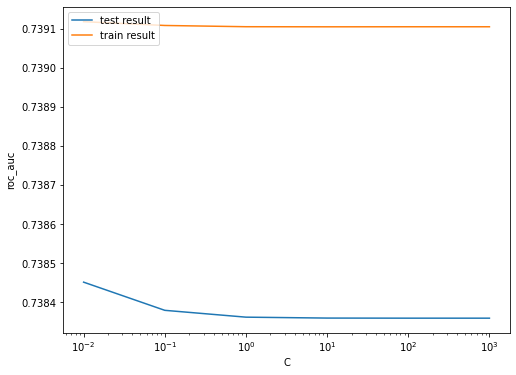

In [442]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [443]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.7384517801187351 at C = 0.01


In [444]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=0.1)

In [445]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

In [446]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [447]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[11856  4581]
 [ 5710 10727]]


In [448]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [449]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.6869562572245543
Sensitivity:- 0.6526130072397639
Specificity:- 0.7212995072093448
F1-Score:- 0.675822964246338


In [450]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70     16437
           1       0.70      0.65      0.68     16437

    accuracy                           0.69     32874
   macro avg       0.69      0.69      0.69     32874
weighted avg       0.69      0.69      0.69     32874



In [451]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [452]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.7390105428308572

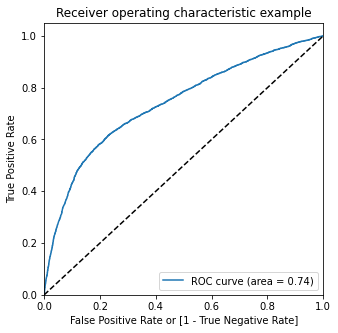

In [453]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [454]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(x_test)

In [455]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5019 1908]
 [ 677 1396]]


In [456]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [457]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7127777777777777
Sensitivity:- 0.673420164013507
Specificity:- 0.7245560848852317


In [458]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.72      0.80      6927
           1       0.42      0.67      0.52      2073

    accuracy                           0.71      9000
   macro avg       0.65      0.70      0.66      9000
weighted avg       0.78      0.71      0.73      9000



In [459]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(x_test)[:,1]

In [460]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.7487834505400577

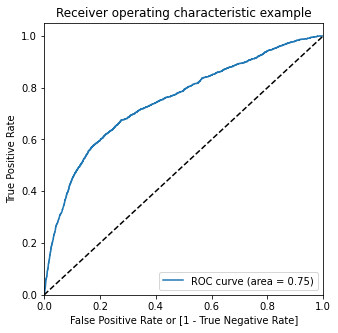

In [461]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# summary

# Train set
Accuracy : 0.68
Sensitivity : 0.65
Specificity : 0.71
ROC :         0.74

# Test set
Accuracy :  0.70
Sensitivity : 0.67
Specificity : 0.71
ROC :         0.75


# XGBoost

In [462]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros)  

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, 

In [463]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.741682,0.016307,0.009974,8.146855e-04,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.802050,0.801780,0.800046,0.801292,0.000888,6,0.820705,0.817983,0.818967,0.819218,0.001126
1,0.873540,0.000889,0.009309,4.702465e-04,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.806610,0.804464,0.802997,0.804690,0.001484,3,0.822420,0.821085,0.821184,0.821563,0.000608
2,0.879643,0.002252,0.009641,4.697969e-04,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.807700,0.802751,0.802190,0.804214,0.002476,4,0.822526,0.819253,0.821879,0.821219,0.001415
3,0.727790,0.003317,0.009974,2.973602e-07,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.801622,0.804998,0.801333,0.802651,0.001664,5,0.837467,0.832365,0.833866,0.834566,0.002141
4,0.869040,0.003018,0.009308,4.700779e-04,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.816465,0.819192,0.816086,0.817248,0.001384,2,0.854811,0.851144,0.849148,0.851701,0.002345
5,0.909718,0.018318,0.009517,7.651058e-04,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.825671,0.825689,0.825494,0.825618,0.000088,1,0.860438,0.858697,0.859554,0.859563,0.000711


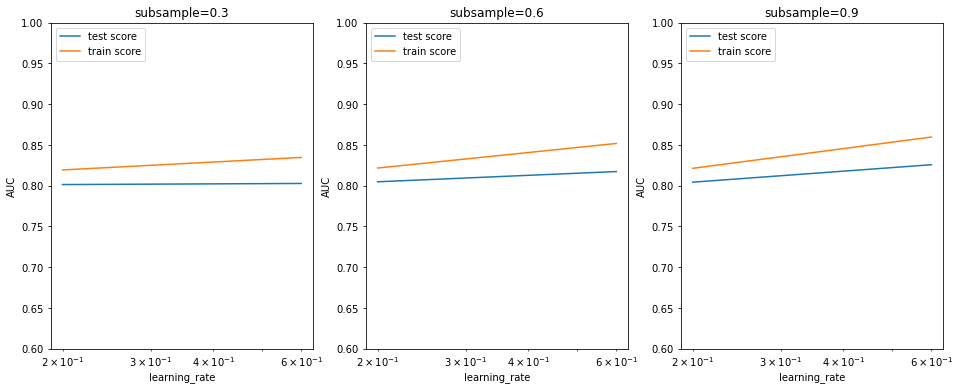

In [464]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [465]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [466]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

[12:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor=None, ...)

In [467]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

In [468]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)

[[16437     0]
 [    0 16437]]


In [469]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [470]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8804526373425807
Sensitivity:- 1.0
Specificity:- 1.0


In [471]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     16437
           1       0.88      0.88      0.88     16437

    accuracy                           0.88     32874
   macro avg       0.88      0.88      0.88     32874
weighted avg       0.88      0.88      0.88     32874



In [472]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [473]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.951849234782368

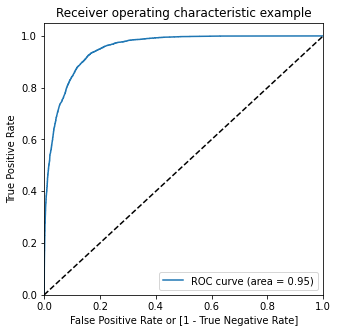

In [474]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [475]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(x_test)

In [476]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5696 1231]
 [ 882 1191]]


In [477]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [478]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7652222222222222
Sensitivity:- 0.5745296671490593
Specificity:- 0.8222895914537318


In [479]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      6927
           1       0.49      0.57      0.53      2073

    accuracy                           0.77      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.78      0.77      0.77      9000



In [480]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(x_test)[:,1]

In [481]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.7604536691683257

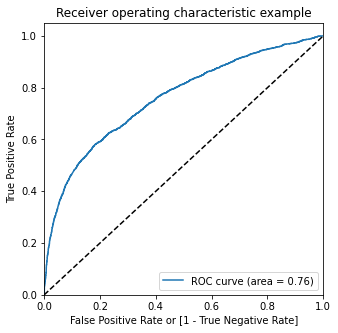

In [482]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# summary

# Train set
Accuracy : 0.88
Sensitivity : 1.0
Specificity : 1.0
ROC :         0.96

# Test set
Accuracy :  0.76
Sensitivity : 0.56
Specificity : 0.82
ROC :         0.76


# Decision tree

In [483]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [484]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.140843,0.031083,0.007314,0.000470,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.769076,0.760582,0.760375,0.763344,0.004054,7
1,0.126266,0.011874,0.006480,0.002112,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.769076,0.760582,0.760375,0.763344,0.004054,7
2,0.110585,0.014309,0.006316,0.001243,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.769833,0.761724,0.760124,0.763894,0.004250,5
3,0.097585,0.001824,0.004321,0.000471,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.769833,0.761724,0.760124,0.763894,0.004250,5
4,0.199603,0.046157,0.007315,0.003292,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.796434,0.799927,0.793616,0.796659,0.002581,2
5,0.157914,0.011235,0.005652,0.000940,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.796646,0.799870,0.793525,0.796681,0.002590,1
6,0.153136,0.009757,0.006295,0.000949,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.792420,0.790425,0.784456,0.789100,0.003383,4
7,0.138963,0.001676,0.004324,0.000473,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.792420,0.790427,0.784501,0.789116,0.003363,3


In [485]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.7966805522239183
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [486]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

In [487]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

In [488]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[12563  3874]
 [ 4875 11562]]


In [489]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [490]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7338626270000609
Sensitivity:- 0.7034130315751049
Specificity:- 0.7643122224250167


In [491]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74     16437
           1       0.75      0.70      0.73     16437

    accuracy                           0.73     32874
   macro avg       0.73      0.73      0.73     32874
weighted avg       0.73      0.73      0.73     32874



In [492]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [493]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.8134990236641797

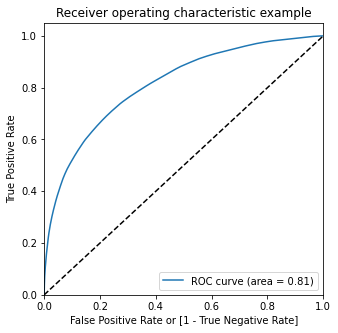

In [494]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [495]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(x_test)

In [496]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5199 1728]
 [ 728 1345]]


In [497]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [498]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7271111111111112
Sensitivity:- 0.648818137964303
Specificity:- 0.7505413598960589


In [499]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      6927
           1       0.44      0.65      0.52      2073

    accuracy                           0.73      9000
   macro avg       0.66      0.70      0.67      9000
weighted avg       0.78      0.73      0.74      9000



In [500]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(x_test)[:,1]

In [501]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.7591516894781226

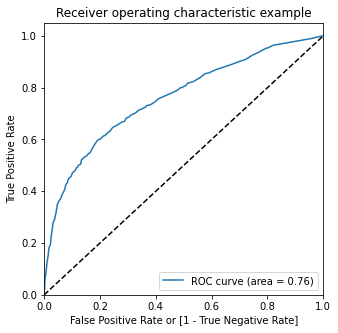

In [502]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# summary

# Train set
Accuracy : 0.73
Sensitivity : 0.68
Specificity : 0.78
ROC :         0.81

# Test set
Accuracy :  0.73
Sensitivity : 0.60
Specificity : 0.73
ROC :         0.75


# SMOTE (Synthetic Minority Oversampling Technique)

In [503]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [504]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

In [505]:
print('Before SMOTE oversampling X_train shape=',x_train.shape)
print('After SMOTE oversampling X_train shape=',x_train_smote.shape)

Before SMOTE oversampling X_train shape= (21000, 19)
After SMOTE oversampling X_train shape= (32874, 19)


# Logistic Regression

In [506]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(x_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [507]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.210197,0.100373,0.012567,0.012177,0.01,{'C': 0.01},0.740785,0.747767,0.744534,0.762157,0.750320,0.749112,0.007263,1,0.752269,0.750050,0.750946,0.746122,0.749681,0.749814,0.002050
1,0.144344,0.010356,0.007181,0.002035,0.1,{'C': 0.1},0.740910,0.747709,0.744469,0.762036,0.750295,0.749084,0.007200,2,0.752281,0.750103,0.750986,0.746168,0.749744,0.749856,0.002041
2,0.115675,0.007851,0.005784,0.001465,1,{'C': 1},0.740924,0.747694,0.744457,0.762036,0.750291,0.749080,0.007199,6,0.752281,0.750115,0.750996,0.746174,0.749752,0.749864,0.002040
3,0.100135,0.010241,0.004986,0.000631,10,{'C': 10},0.740925,0.747693,0.744456,0.762038,0.750292,0.749081,0.007200,5,0.752280,0.750115,0.750998,0.746175,0.749754,0.749865,0.002040
4,0.075400,0.006811,0.003989,0.000631,100,{'C': 100},0.740927,0.747694,0.744456,0.762037,0.750292,0.749081,0.007199,3,0.752281,0.750115,0.750998,0.746175,0.749754,0.749865,0.002040
5,0.064829,0.009793,0.003789,0.000399,1000,{'C': 1000},0.740927,0.747694,0.744456,0.762037,0.750292,0.749081,0.007199,4,0.752281,0.750115,0.750998,0.746175,0.749754,0.749865,0.002040


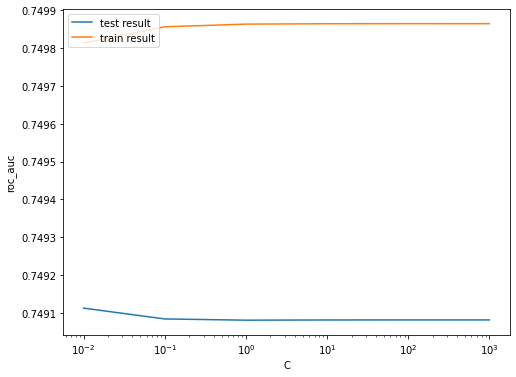

In [508]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [509]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.7491123557530805 at C = 0.01


In [510]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [511]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(x_train_smote, y_train_smote)

In [512]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(x_train_smote)

In [513]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[11944  4493]
 [ 5575 10862]]


In [514]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [515]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.6937397335280161
Sensitivity:- 0.6608261848269149
Specificity:- 0.7266532822291172


In [516]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70     16437
           1       0.71      0.66      0.68     16437

    accuracy                           0.69     32874
   macro avg       0.69      0.69      0.69     32874
weighted avg       0.69      0.69      0.69     32874



In [517]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(x_train_smote)[:,1]

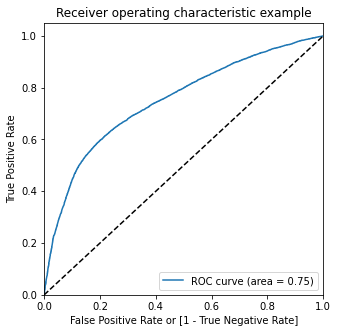

In [518]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

In [519]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(x_test)

In [520]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5050 1877]
 [ 693 1380]]


In [521]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [522]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7144444444444444
Sensitivity:- 0.6657018813314037
Specificity:- 0.7290313266926519


In [523]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      6927
           1       0.42      0.67      0.52      2073

    accuracy                           0.71      9000
   macro avg       0.65      0.70      0.66      9000
weighted avg       0.77      0.71      0.73      9000



In [524]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(x_test)[:,1]

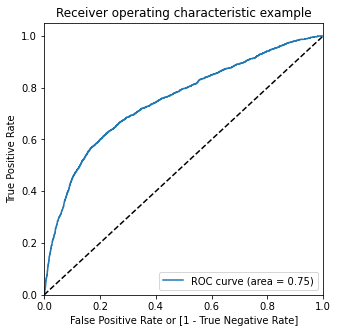

In [525]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# summary

# Train set
Accuracy : 0.69
Sensitivity : 0.65
Specificity : 0.72
ROC :         0.75

# Test set
Accuracy :  0.70
Sensitivity : 0.66
Specificity : 0.72
ROC :         0.75

# XGBoost

In [526]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train_smote, y_train_smote)    

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, 

In [527]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.791567,0.028319,0.010971,1.410290e-03,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.788399,0.876821,0.884046,0.849755,0.043486,6,0.927697,0.855175,0.856995,0.879956,0.033767
1,0.964108,0.015067,0.010971,2.154535e-03,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.789762,0.887647,0.897642,0.858350,0.048671,4,0.937590,0.862755,0.865389,0.888578,0.034673
2,1.023121,0.027989,0.009974,2.973602e-07,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.792388,0.898970,0.895321,0.862226,0.049405,3,0.940435,0.866845,0.863022,0.890100,0.035626
3,0.770791,0.008344,0.009974,1.251540e-06,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.757053,0.899400,0.897678,0.851377,0.066701,5,0.969424,0.875111,0.870656,0.905063,0.045546
4,1.011486,0.013384,0.009641,4.704151e-04,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.758716,0.927692,0.924658,0.870355,0.078951,2,0.980921,0.894145,0.891323,0.922130,0.041588
5,1.025612,0.032331,0.009309,4.701342e-04,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.765395,0.938107,0.939642,0.881048,0.081781,1,0.984346,0.902037,0.900512,0.928965,0.039165


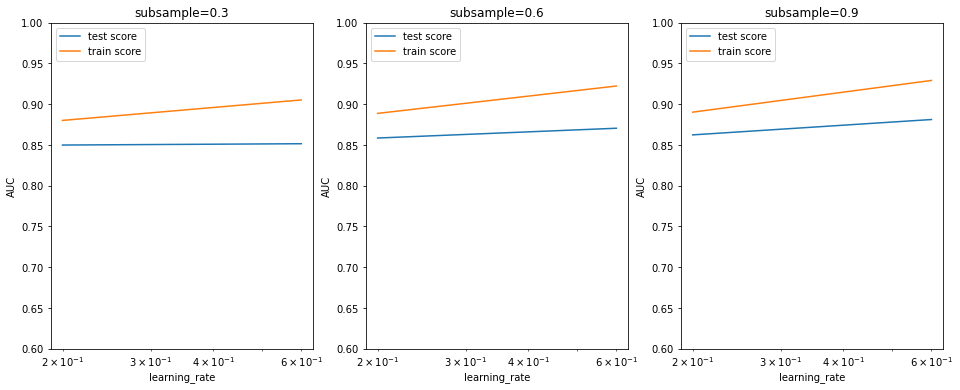

In [528]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [529]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [530]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(x_train_smote, y_train_smote)

[12:15:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor=None, ...)

In [531]:
# Predictions on the train set
y_train_pred_sxg = xgb_bal_smote_model.predict(x_train_smote)

In [532]:
y_train_pred_sxg

array([0, 0, 1, ..., 1, 1, 1])

In [533]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[11944  4493]
 [ 5575 10862]]


In [534]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [535]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.6937397335280161
Sensitivity:- 0.6608261848269149
Specificity:- 0.7266532822291172


In [536]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70     16437
           1       0.71      0.66      0.68     16437

    accuracy                           0.69     32874
   macro avg       0.69      0.69      0.69     32874
weighted avg       0.69      0.69      0.69     32874



In [537]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(x_train_smote)[:,1]

In [538]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.970069481159078

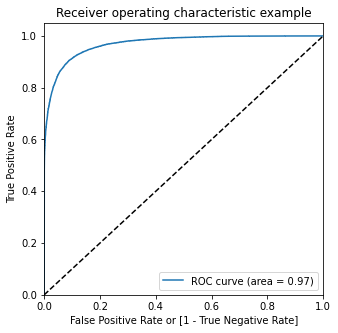

In [539]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [540]:
# Predictions on the test set
y_test_pred_sxg = xgb_bal_smote_model.predict(x_test)

In [541]:
y_test_pred_sxg

array([0, 0, 0, ..., 0, 1, 0])

In [542]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5050 1877]
 [ 693 1380]]


In [543]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [544]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7144444444444444
Sensitivity:- 0.6657018813314037
Specificity:- 0.7290313266926519


In [545]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      6927
           1       0.42      0.67      0.52      2073

    accuracy                           0.71      9000
   macro avg       0.65      0.70      0.66      9000
weighted avg       0.77      0.71      0.73      9000



In [546]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(x_test)[:,1]

In [547]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.7510825631032911

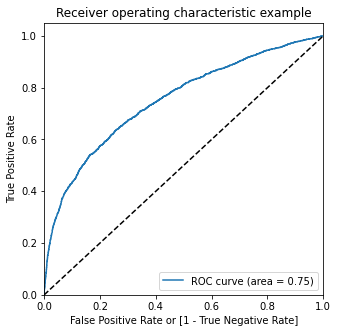

In [548]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# summary

# Train set
Accuracy : 0.92
Sensitivity : 0.87
Specificity : 0.96
ROC :         0.98

# Test set
Accuracy :  0.80
Sensitivity : 0.39
Specificity : 0.92
ROC :         0.76

# Decision Tree

In [549]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [550]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.109356,0.002366,0.004342,4.556362e-04,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.755113,0.793495,0.787929,0.778846,0.016935,7
1,0.104057,0.002619,0.004657,4.665937e-04,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.755113,0.793495,0.787929,0.778846,0.016935,7
2,0.105387,0.001244,0.004322,4.697419e-04,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.756247,0.794216,0.786408,0.778957,0.016372,5
3,0.104057,0.002637,0.004332,4.638863e-04,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.756247,0.794216,0.786408,0.778957,0.016372,5
4,0.174870,0.005446,0.004976,1.438569e-05,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.764780,0.842565,0.838075,0.815140,0.035657,2
5,0.177550,0.007246,0.004986,2.570305e-06,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.764834,0.843041,0.838075,0.815317,0.035754,1
6,0.170881,0.004486,0.004321,4.708648e-04,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.766672,0.830363,0.826790,0.807942,0.029219,4
7,0.167555,0.006162,0.004987,1.946680e-07,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.766663,0.831172,0.826790,0.808208,0.029431,3


In [551]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.8153167031546878
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [552]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [553]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(x_train_smote)

In [554]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[13515  2922]
 [ 4564 11873]]


In [555]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [556]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.772282046602178
Sensitivity:- 0.7223337592018008
Specificity:- 0.8222303340025552


In [557]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78     16437
           1       0.80      0.72      0.76     16437

    accuracy                           0.77     32874
   macro avg       0.78      0.77      0.77     32874
weighted avg       0.78      0.77      0.77     32874



In [558]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(x_train_smote)[:,1]

In [559]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.8587371097283258

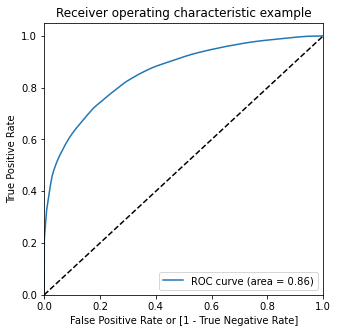

In [560]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [561]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(x_test)

In [562]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5508 1419]
 [ 923 1150]]


In [563]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [564]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7397777777777778
Sensitivity:- 0.5547515677761699
Specificity:- 0.7951494153313122


In [565]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.82      6927
           1       0.45      0.55      0.50      2073

    accuracy                           0.74      9000
   macro avg       0.65      0.67      0.66      9000
weighted avg       0.76      0.74      0.75      9000



In [566]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(x_test)[:,1]

In [567]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.7408821901281721

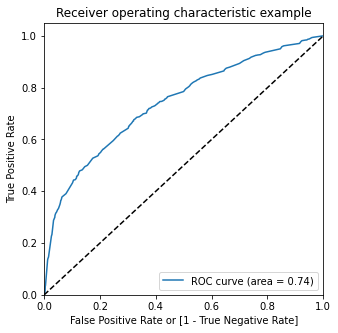

In [568]:
#Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# summary

# Train set
Accuracy : 0.78
Sensitivity : 0.71
Specificity : 0.83
ROC :         0.87

# Test set
Accuracy :  0.76
Sensitivity : 0.53
Specificity : 0.83
ROC :         0.74

# Choosing The Best Model

I have tried the logistic regression, XGBoost, Decision Tree and Random Forest and did all the models train and tested by balancing the data using UNDERSAMPLING, OVERSAMPLING, and SMOTE and I see that all the model performed good.

BUT by doing undersampling we lost some data, and then did train and test the model that is not good , so it is not better to go with the undersampling.

SMOTE with XGBoost gave us best accuracy 0.92 in the train and 0.80 in the test, with the best training ROC score 0.98 and testing ROC score is 0.76.

# Cost Benefit Analysis

Even though XGBoost , Decision tree and Random forest taking much higher computational power in comparison to the logistic regression but we have to go with them.

Because we are building the model for the financial case, Ammount scam can be huge. so to get rid of these types of huge losses we have to build the accurate and precise model even though model take good ammount of computational cost.


# Summary For the Business

1. High Accuracy : We would need high precision for banks with lesser average transaction values because we only want to flag relevant transactions as fraudulent. We may add the human element to every transaction that is reported as fraudulent, calling the customer to confirm that the transaction actually took place.

2. But it wiil be difficult, when accuracy is poor because the human component must be increased.

3. If the recall is low, i.e., it is unable to identify transactions that are flagged as non-fraudulent, this will affect banks with higher transaction values. so for the high transaction scam not to be happen, we need high recall.

4. After performing the lot of models, I saw that balanced data with SMOTE technique, XGBoost model has very good accuracy, best ROC score and high Recall as well as High accuracy. Therefore we can go with the XGBoost model. That will reduce the scam till the most extreem cases.

what we need --> 1. High Accuracy
                 2. High Recall
                 3. High Roc score

# New data prediction

In [572]:
# data of class 1
input1 = np.array([[4000,2,3,2,2,2,2,2102,2208,2210,2410,2501,2608,1200,1800,2400,3600,1000,3000]])

In [573]:
input1

array([[4000,    2,    3,    2,    2,    2,    2, 2102, 2208, 2210, 2410,
        2501, 2608, 1200, 1800, 2400, 3600, 1000, 3000]])

In [574]:
xgb_bal_smote_model.predict(input1)

array([0])

In [575]:
# data of class 0
input2 = np.array([[23.0,0,0,0,0,0,0,29239.0,14027.0,13559.0,1331.0,14948.0,15549.0,1518.0,1500.0,10.0,1000.0,10.0,5000.0]])
xgb_bal_smote_model.predict(input2)

array([0])

In [576]:
# data of class 1
input3 = np.array([[120000.0,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0]])

In [577]:
# data of class of 1
input4 = np.array([[70000.0,1,2,2,0,0,2,65802.0,67369.0,65701.0,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0]])

In [578]:
# data of class 0
input5 = np.array([[130000.0,0,0,0,0,0,-1,38358.0,27688.0,24489.0,20616.0,11802.0,930.0,3000.0,1537.0,1000.0,2000.0,930.0,33764.0]])

In [579]:
# data of class 0
input6 = np.array([[220000.0,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0]])

In [580]:
# data of class 0
input7 = np.array([[360000.0,-1,-1,-1,0,0,-1,735.0,51.0,20007.0,18498.0,18422.0,1842.0,51.0,20007.0,1590.0,1000.0,1842.0,390.0]])

In [581]:
# output pattern 1,0,1,1,0,0,0

In [582]:
logistic_bal_smote_model.predict(input1)

array([0], dtype=int64)

In [583]:
logistic_bal_smote_model.predict(input2)

array([0], dtype=int64)

In [584]:
logistic_bal_smote_model.predict(input3)

array([0], dtype=int64)

In [585]:
logistic_bal_smote_model.predict(input4)

array([0], dtype=int64)

In [586]:
logistic_bal_smote_model.predict(input5)

array([0], dtype=int64)

In [587]:
dt_bal_smote_model.predict(input6)                           # logistic smote is not working fine.

array([0], dtype=int64)

In [588]:
dt_bal_smote_model.predict(input7) 

array([0], dtype=int64)

In [589]:
dt_bal_smote_model.predict(input1)

array([1], dtype=int64)

In [590]:
dt_bal_smote_model.predict(input2)

array([0], dtype=int64)

In [591]:
dt_bal_smote_model.predict(input3)                        #  -----> this is giving wrong

array([0], dtype=int64)

In [592]:
dt_bal_smote_model.predict(input4)

array([1], dtype=int64)

In [593]:
dt_bal_smote_model.predict(input5)                            

array([0], dtype=int64)

In [594]:
dt_bal_smote_model.predict(input6)  

array([0], dtype=int64)

In [595]:
dt_bal_smote_model.predict(input7)                     # decision tree performing well

array([0], dtype=int64)

In [596]:
xgb_bal_smote_model.predict(input1)

array([0])

In [597]:
xgb_bal_smote_model.predict(input2)            # ----> this is wrong

array([0])

In [598]:
xgb_bal_smote_model.predict(input3)

array([1])

In [599]:
xgb_bal_smote_model.predict(input4)

array([1])

In [600]:
xgb_bal_smote_model.predict(input5)                             

array([1])

In [601]:
xgb_bal_smote_model.predict(input6) 

array([0])

In [602]:
xgb_bal_smote_model.predict(input7)         # ---> this is wrong                       # it is also performing well

array([1])

# Save the traning model in the file ---> Pickle file / joblib file type

# Pickling the model

In [603]:
# Pickling the model for deployment
import pickle
with open('model_xgboost.pkl','wb') as file:
    pickle.dump(xgb_bal_smote_model,file)

In [604]:
# if we want to use the the model we can use it named as model_xgboost 
# but we have to load it firstly like this
with open('model_xgboost','rb') as f :
    mp = pickle.load(f)   # model has been loaded in the new variable named as mp

FileNotFoundError: [Errno 2] No such file or directory: 'model_xgboost'

In [605]:
# Pickling the model for deployment
import pickle
with open('model_logistic.pkl','wb') as file:
    pickle.dump(logistic_bal_smote_model,file)
    

In [606]:
with open('model_logistic.pkl','rb') as f:
    mp = pickle.load(f)

In [607]:
mp.

SyntaxError: invalid syntax (500608622.py, line 1)

# Joblib file type 

In [608]:
# one more way to save the model instead of as a pickle file --> joblib 
# we basically use it when large numbers of features in the array form ,it performs well.


import joblib
joblib.dump(xgb_bal_smote_model,'joblib_xgboost_model')

['joblib_xgboost_model']

In [609]:
pwd


'C:\\Users\\rpsin\\Documents\\Credit Card Fault Detection Project'